In [4]:

import matplotlib.pyplot as plt
import numpy as np
import itertools as it
from math import pi
     

from qutip import *
from scipy import *

In [56]:
toy_models = {
            "1":
               {
                   "j_map" : [[0,1,1,-1,0],[1,0,1,0,-1],[1,1,0,1,1],[-1,0,1,0,1],[0,-1,1,1,0]],
                   "gs_indeces": [  {"i":0, "suppressed": True},
                                    {"i":3, "suppressed": False},
                                    {"i":7, "suppressed": False}]
                   },
            "2": {
                    "j_map" : [[0,2,1,2,1],[2,0,-2,-1,1],[1,-2,0,1,2],[2,-1,1,0,-2],[1,1,2,-2,0]],
                    "gs_indeces": [{"i":0, "suppressed": False},
                                    {"i":2, "suppressed": False},
                                    {"i":5, "suppressed": True},
                                    {"i":6, "suppressed": False},
                                    {"i":8, "suppressed": False},
                                    {"i":9, "suppressed": False}]
                },
            "3": {
                    "j_map" : [[0,0,1,0,0,0],[0,0,0,1,0,0],[1,0,0,-1,1,-1],[0,1,-1,0,1,-1],[0,0,1,1,0,1], [0,0,-1,-1,1,0]],
                    "gs_indeces": [{"i":1, "suppressed": True},
                                    {"i":20, "suppressed": False},
                                    {"i":23, "suppressed": False}]
                },

            "4": {
                    "j_map" : [[0,1,0,0],[0,0,-1,-1],[0,-1,0,-1],[0,-1,-1,0]],
                    "gs_indeces": [{"i":1, "suppressed": True},
                                    {"i":2, "suppressed": True},
                                    {"i":3, "suppressed": False}]
                },

            
            
            }


t_i = "4"

model = toy_models[t_i]
j_map = model["j_map"]
gs_indeces = model["gs_indeces"]
N = len(j_map[0])

In [57]:
# Generate "artificial" fair sampling state

N = len(toy_models[t_i]["j_map"][0])

fair_sampling_gs = np.zeros([2**N,1])
gs_size = len(toy_models[t_i]["gs_indeces"])



for gs in toy_models[t_i]["gs_indeces"]:
    fair_sampling_gs[gs["i"]] = 1/np.sqrt(gs_size)
    # fair_sampling_gs[(2**N) - 1 - gs["i"]] = 1/np.sqrt(gs_size)


fair_sampling_gs = Qobj(fair_sampling_gs, dims = [[2 for i in range(N)], [1 for i in range(N)]])
print(fair_sampling_gs)


entropy_vals = []
entropy_vals.append(
    [
        [bp,round(entropy_vn(fair_sampling_gs.ptrace(list(bp))),6)]
        for bp in list(it.combinations(range(N), int(np.ceil(N/2))))
    ]
)
entropy_vals

Quantum object: dims=[[2, 2, 2, 2], [1, 1, 1, 1]], shape=(16, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.57735027]
 [0.57735027]
 [0.57735027]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


[[[(0, 1), -0.0],
  [(0, 2), 0.381264],
  [(0, 3), 0.381264],
  [(1, 2), 0.381264],
  [(1, 3), 0.381264],
  [(2, 3), -0.0]]]

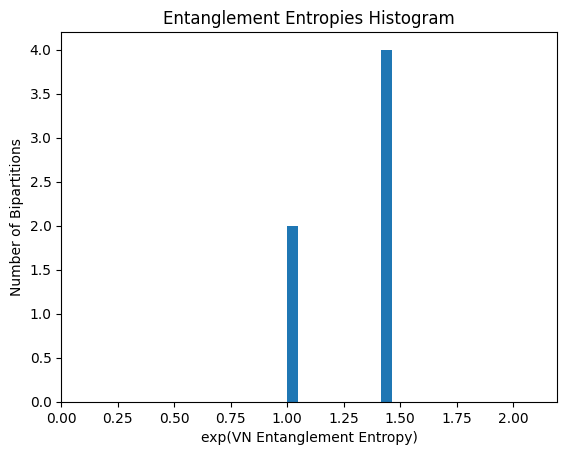

[1.0, 1.464, 1.464, 1.464, 1.464, 1.0]


In [58]:

# Pull raw entanglement entropy values out of results. Round to 3 decimal places so that hist bins aren't over precise
ee_vals = [round(np.e ** bp_e[1],3) for bp_e in entropy_vals[0]]

plt.hist(ee_vals)
plt.xlim(0,max(ee_vals)*1.5)

plt.title('Entanglement Entropies Histogram')
plt.ylabel('Number of Bipartitions')
plt.xlabel("exp(VN Entanglement Entropy)")
plt.show()
print(ee_vals)

In [59]:
# Calculate disconnectivity


out_obj  = {}
min_delta_m = 100
min_delta_m_info = []

for bp_size in range(2,N + 1):
    out_obj[bp_size] = []

    

    for bp in list(it.combinations(range(N), bp_size)):
        bp_obj = {}

        bp_obj["bp"] = list(bp)

        bp_obj["s_m"] = round(entropy_vn(fair_sampling_gs.ptrace(list(bp))),5)
        
        min_sub_m_ent = 100000
        min_sub_m_bp = []
        for s_bp_size in range(1,bp_size):
            for sbp in list(it.combinations(list(bp), s_bp_size)):
                sub_m_ent = round(2*entropy_vn(fair_sampling_gs.ptrace(list(sbp))),5)
                if sub_m_ent < min_sub_m_ent:
                    min_sub_m_ent = sub_m_ent
                    min_sub_m_bp = list(sbp)

        bp_obj["min_sub_bp"] = min_sub_m_bp
        bp_obj["min_sub_s"] = min_sub_m_ent
        
        delta_m = bp_obj["s_m"]/bp_obj["min_sub_s"] if bp_obj["min_sub_s"] != 0 else 1
            

        
        bp_obj["delta_m"] = delta_m

        if delta_m < min_delta_m:
            min_delta_m = delta_m
            min_delta_m_info = [bp_obj]
        elif delta_m == min_delta_m:
            min_delta_m_info.append(bp_obj)

        out_obj[bp_size].append(bp_obj)


out_obj


{2: [{'bp': [0, 1],
   's_m': -0.0,
   'min_sub_bp': [0],
   'min_sub_s': -0.0,
   'delta_m': 1},
  {'bp': [0, 2],
   's_m': 0.38126,
   'min_sub_bp': [0],
   'min_sub_s': -0.0,
   'delta_m': 1},
  {'bp': [0, 3],
   's_m': 0.38126,
   'min_sub_bp': [0],
   'min_sub_s': -0.0,
   'delta_m': 1},
  {'bp': [1, 2],
   's_m': 0.38126,
   'min_sub_bp': [1],
   'min_sub_s': -0.0,
   'delta_m': 1},
  {'bp': [1, 3],
   's_m': 0.38126,
   'min_sub_bp': [1],
   'min_sub_s': -0.0,
   'delta_m': 1},
  {'bp': [2, 3],
   's_m': -0.0,
   'min_sub_bp': [2],
   'min_sub_s': 0.76253,
   'delta_m': -0.0}],
 3: [{'bp': [0, 1, 2],
   's_m': 0.38126,
   'min_sub_bp': [0],
   'min_sub_s': -0.0,
   'delta_m': 1},
  {'bp': [0, 1, 3],
   's_m': 0.38126,
   'min_sub_bp': [0],
   'min_sub_s': -0.0,
   'delta_m': 1},
  {'bp': [0, 2, 3],
   's_m': -0.0,
   'min_sub_bp': [0],
   'min_sub_s': -0.0,
   'delta_m': 1},
  {'bp': [1, 2, 3],
   's_m': -0.0,
   'min_sub_bp': [1],
   'min_sub_s': -0.0,
   'delta_m': 1}],
 4: [{

In [60]:
min_delta_m_info

[{'bp': [2, 3],
  's_m': -0.0,
  'min_sub_bp': [2],
  'min_sub_s': 0.76253,
  'delta_m': -0.0}]

In [45]:
# 1
[{'bp': [2, 3, 4],
  's_m': -0.0,
  'min_sub_bp': [2],
  'min_sub_s': 0.76253,
  'delta_m': -0.0}]

# 2
[{'bp': [1, 2, 3, 4],
  's_m': -0.0,
  'min_sub_bp': [1],
  'min_sub_s': 1.15501,
  'delta_m': -0.0}]

# 3
[{'bp': [1, 3, 4, 5],
  's_m': -0.0,
  'min_sub_bp': [1],
  'min_sub_s': 1.27303,
  'delta_m': -0.0}]

# 4
[{'bp': [2, 3],
  's_m': -0.0,
  'min_sub_bp': [2],
  'min_sub_s': 0.76253,
  'delta_m': -0.0}]


[{'bp': [2, 3, 4],
  's_m': -0.0,
  'min_sub_bp': [2],
  'min_sub_s': 0.76253,
  'delta_m': -0.0}]